In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pickle
import joblib

In [2]:
data = pd.read_csv(r"C:\Projects\Personalized-Drug-Response\data\PANCANCER_ANOVA_Fri Feb 28 05_58_52 2025.csv")
data.head()

,Drug name,Drug ID,Drug target,Target Pathway,Feature Name,n_feature_pos,n_feature_neg,ic50_effect_size,log_ic50_mean_pos,log_ic50_mean_neg,...,feature_ic50_t_pval,feature_delta_mean_ic50,feature_pos_ic50_var,feature_neg_ic50_var,feature_pval,tissue_pval,msi_pval,fdr,Tissue Type,Screening Set
0,Camptothecin,1003,TOP1,DNA replication,ABCB1_mut,16,949,0.559182,-1.248911,-2.274636,...,0.020317,1.025725,1.571565,1.838187,0.063782,0.0,0.104659,63.449939,PANCANCER,GDSC2
1,Camptothecin,1003,TOP1,DNA replication,ABL2_mut,7,958,0.373240,-2.938700,-2.252653,...,0.406394,-0.686047,2.029013,1.836828,0.862946,0.0,0.105291,91.677351,PANCANCER,GDSC2
2,Camptothecin,1003,TOP1,DNA replication,ACACA_mut,11,954,0.159295,-1.968064,-2.260968,...,0.531192,0.292904,1.486441,1.842088,0.848725,0.0,0.105290,91.380248,PANCANCER,GDSC2
3,Camptothecin,1003,TOP1,DNA replication,ACVR1B_mut,3,962,0.984940,-0.454658,-2.263252,...,0.291788,1.808593,2.208877,1.835393,0.289209,0.0,0.105088,73.551537,PANCANCER,GDSC2
4,Camptothecin,1003,TOP1,DNA replication,ACVR2A_mut,22,943,0.038353,-2.188707,-2.259237,...,0.816522,0.070530,1.380850,1.847901,0.419372,0.0,0.105175,80.541274,PANCANCER,GDSC2


In [3]:
data.shape

(200920, 22)

In [4]:
data.isnull().sum()

Drug name                       0
Drug ID                         0
Drug target                 27155
Target Pathway               1362
Feature Name                    0
n_feature_pos                   0
n_feature_neg                   0
ic50_effect_size                0
log_ic50_mean_pos               0
log_ic50_mean_neg               0
log_max_conc_tested        200920
log_max_conc_tested_2      200920
feature_ic50_t_pval             0
feature_delta_mean_ic50         0
feature_pos_ic50_var            0
feature_neg_ic50_var            0
feature_pval                    0
tissue_pval                     0
msi_pval                        0
fdr                             0
Tissue Type                     0
Screening Set                   0
dtype: int64

In [5]:
data.drop(columns=["log_max_conc_tested", "log_max_conc_tested_2"], inplace=True)
data.shape

(200920, 20)

In [6]:
data.dropna(inplace=True)
data.shape

(173765, 20)

In [7]:
data.duplicated().sum()

0

In [8]:
data.columns

Index(['Drug name', 'Drug ID', 'Drug target', 'Target Pathway', 'Feature Name',
       'n_feature_pos', 'n_feature_neg', 'ic50_effect_size',
       'log_ic50_mean_pos', 'log_ic50_mean_neg', 'feature_ic50_t_pval',
       'feature_delta_mean_ic50', 'feature_pos_ic50_var',
       'feature_neg_ic50_var', 'feature_pval', 'tissue_pval', 'msi_pval',
       'fdr', 'Tissue Type', 'Screening Set'],
      dtype='object')

In [9]:
data = data.drop(columns=['Screening Set', 'Tissue Type'], axis = 1)

In [10]:
cat = data.select_dtypes(include=['object'])
print(cat.columns)

Index(['Drug name', 'Drug target', 'Target Pathway', 'Feature Name'], dtype='object')


In [11]:
encoder = LabelEncoder()
for col in cat.columns:
    data[col] = encoder.fit_transform(data[col])

In [12]:
data

,Drug name,Drug ID,Drug target,Target Pathway,Feature Name,n_feature_pos,n_feature_neg,ic50_effect_size,log_ic50_mean_pos,log_ic50_mean_neg,feature_ic50_t_pval,feature_delta_mean_ic50,feature_pos_ic50_var,feature_neg_ic50_var,feature_pval,tissue_pval,msi_pval,fdr
0,57,1003,165,7,0,16,949,0.559182,-1.248911,-2.274636,0.020317,1.025725,1.571565,1.838187,0.063782,0.000000e+00,0.104659,63.449939
1,57,1003,165,7,1,7,958,0.373240,-2.938700,-2.252653,0.406394,-0.686047,2.029013,1.836828,0.862946,0.000000e+00,0.105291,91.677351
2,57,1003,165,7,2,11,954,0.159295,-1.968064,-2.260968,0.531192,0.292904,1.486441,1.842088,0.848725,0.000000e+00,0.105290,91.380248
3,57,1003,165,7,3,3,962,0.984940,-0.454658,-2.263252,0.291788,1.808593,2.208877,1.835393,0.289209,0.000000e+00,0.105088,73.551537
4,57,1003,165,7,4,22,943,0.038353,-2.188707,-2.259237,0.816522,0.070530,1.380850,1.847901,0.419372,0.000000e+00,0.105175,80.541274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200915,149,2499,112,14,625,5,728,0.079715,9.922191,9.991624,0.841420,-0.069433,0.724712,0.871756,0.924794,2.556294e-11,0.973290,89.012912
200916,149,2499,112,14,626,5,728,0.252749,10.209755,9.989649,0.631655,0.220106,0.947863,0.870406,0.410949,2.467765e-11,0.973277,82.498760
200917,149,2499,112,14,627,5,728,0.252749,10.209755,9.989649,0.631655,0.220106,0.947863,0.870406,0.410949,2.467765e-11,0.973277,82.498760
200918,149,2499,112,14,628,8,725,0.334048,10.278769,9.987977,0.446792,0.290793,1.017411,0.868970,0.357033,2.445395e-11,0.973274,82.498760


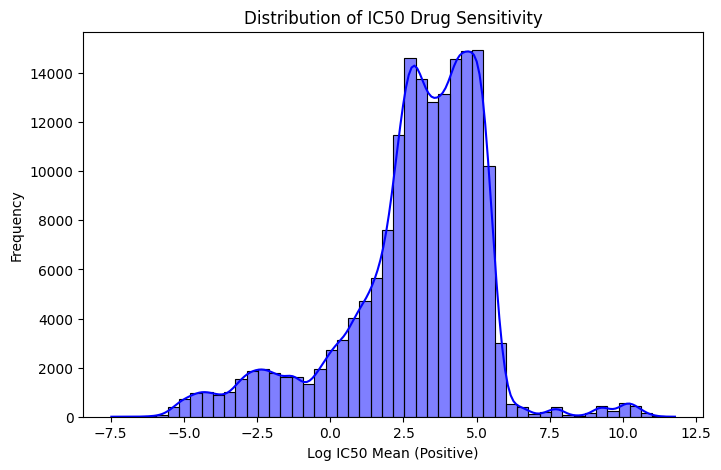

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(data["log_ic50_mean_pos"], bins=50, kde=True, color="blue")
plt.xlabel("Log IC50 Mean (Positive)")
plt.ylabel("Frequency")
plt.title("Distribution of IC50 Drug Sensitivity")
plt.show()


C:\Users\aashutosh kumar\AppData\Local\Temp\ipykernel_33292\2561481755.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_drugs.index, y=top_drugs.values, palette="magma")


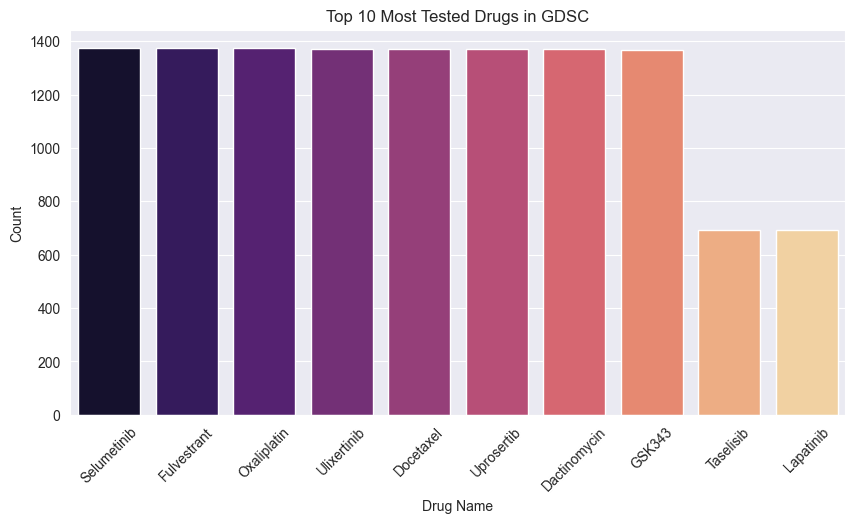

In [64]:
plt.figure(figsize=(10, 5))
top_drugs = data["Drug name"].value_counts().head(10)
sns.barplot(x=top_drugs.index, y=top_drugs.values, palette="magma")
plt.xticks(rotation=45)
plt.xlabel("Drug Name")
plt.ylabel("Count")
plt.title("Top 10 Most Tested Drugs in GDSC")
plt.show()

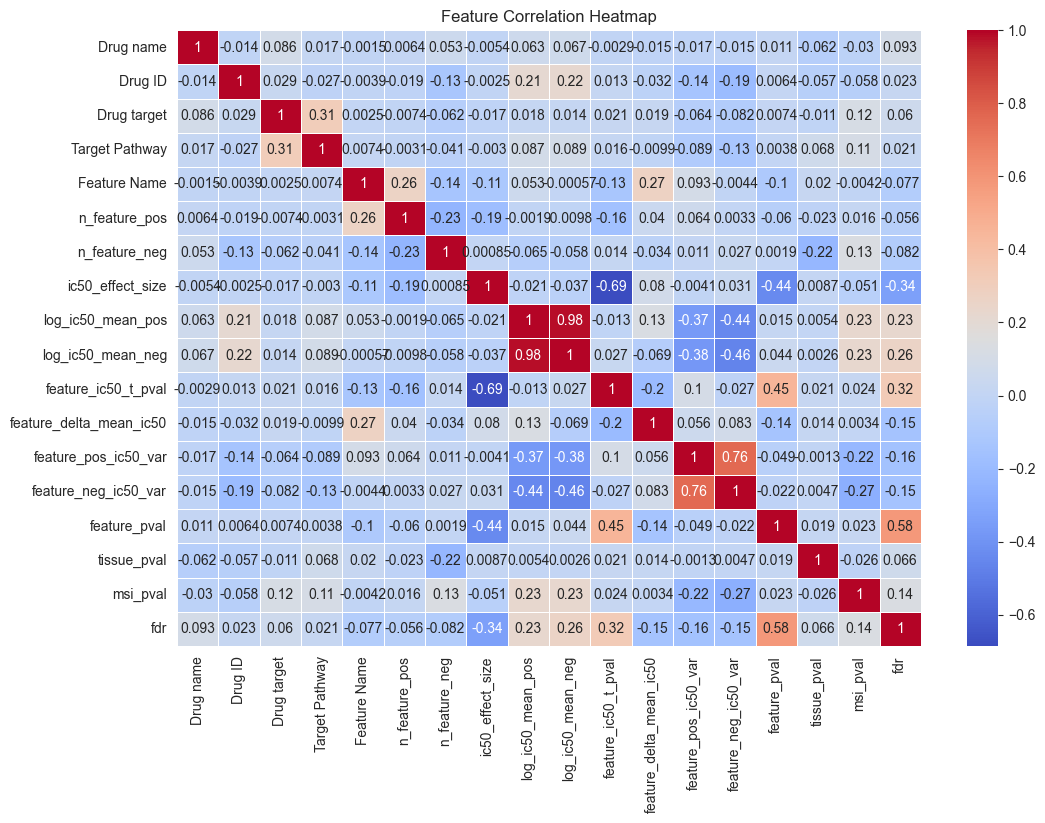

In [69]:
import numpy as np

corr_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


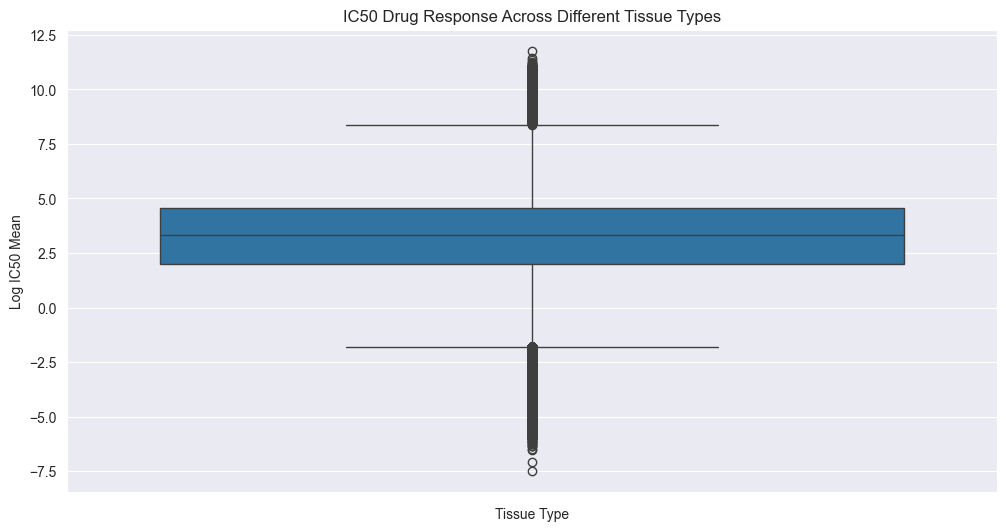

In [72]:
plt.figure(figsize=(12, 6))
sns.boxplot(y="log_ic50_mean_pos", data=data)
plt.xticks(rotation=90)
plt.xlabel("Tissue Type")
plt.ylabel("Log IC50 Mean")
plt.title("IC50 Drug Response Across Different Tissue Types")
plt.show()

In [24]:
y = data['log_ic50_mean_pos']
x = data.drop(columns=['log_ic50_mean_pos'], axis=1)

In [15]:
print(y.shape, x.shape)

(173765,) (173765, 17)


In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [32]:
y_pred = rf_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest - Mean Squared Error: {mse}")
print(f"Random Forest - R-squared Score: {r2}")

Random Forest - Mean Squared Error: 0.0005519716684707245
Random Forest - R-squared Score: 0.9999049898557194


In [33]:
import joblib
joblib.dump(rf_model, 'rf_model.pkl')

['rf_model.pkl']

In [13]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras.layers import Dense, LeakyReLU, Dropout
from keras.models import Sequential
from keras.optimizers import Adam

In [14]:
latent_dim = 100
input_dim = 50  

def build_generator():
    model = Sequential([
        Dense(128, input_dim=latent_dim),
        LeakyReLU(alpha=0.2),
        Dense(256),
        LeakyReLU(alpha=0.2),
        Dense(512),
        LeakyReLU(alpha=0.2),
        Dense(17, activation='linear')  # Output 17 features for drug response
    ])
    return model


In [15]:

def build_discriminator():
    model = Sequential([
        Dense(128, input_dim=17),  # Match the generator output (17 features)
        LeakyReLU(alpha=0.2),
        Dense(64),
        LeakyReLU(alpha=0.2),
        Dense(1, activation='sigmoid')  # Binary classification (real/fake)
    ])
    return model


In [16]:
generator = build_generator()
discriminator = build_discriminator()

opt_g = Adam(learning_rate=0.0002, beta_1=0.5)
opt_d = Adam(learning_rate=0.00005, beta_1=0.5)

discriminator.compile(loss='binary_crossentropy', optimizer=opt_d, metrics=['accuracy'])


c:\a\envs\env2\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\a\envs\env2\lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [17]:
discriminator.trainable = False
gan_input = tf.keras.Input(shape=(latent_dim,))
generated_data = generator(gan_input)
gan_output = discriminator(generated_data)

gan = tf.keras.Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=opt_g)

In [ ]:
epochs = 5000
batch_size = 32
d_losses, g_losses = [], []

for epoch in range(epochs):
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    fake_data = generator.predict(noise)
    
    real_data = x_train.iloc[np.random.randint(0, x_train.shape[0], batch_size)]
    
    real_labels = np.ones((batch_size, 1)) * 0.9 
    fake_labels = np.zeros((batch_size, 1)) 

    d_loss_real = discriminator.train_on_batch(real_data, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_data, fake_labels)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    misleading_labels = np.ones((batch_size, 1))  
    g_loss = gan.train_on_batch(noise, misleading_labels)

    d_losses.append(d_loss[0])
    g_losses.append(g_loss)

    if epoch % 500 == 0:
        print(f"Epoch {epoch}, D Loss: {d_loss[0]}, G Loss: {g_loss}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


c:\a\envs\env2\lib\site-packages\keras\src\backend\tensorflow\trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 0, D Loss: 11.075654029846191, G Loss: 0.6644213199615479
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━

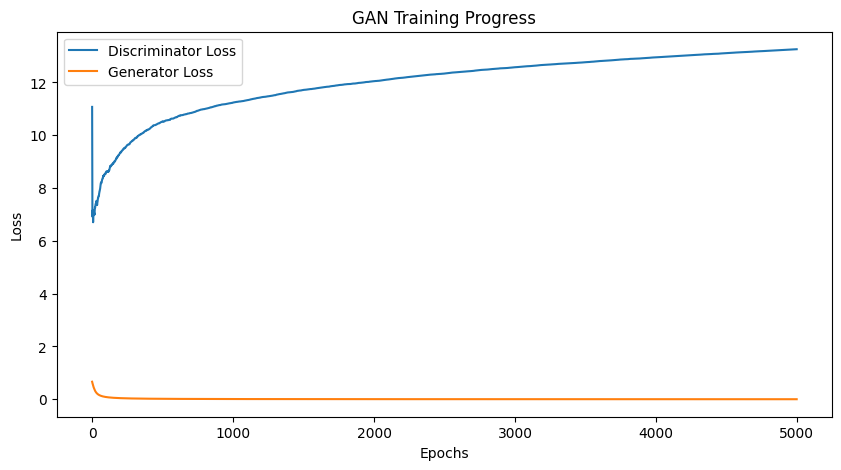

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(d_losses, label="Discriminator Loss")
plt.plot(g_losses, label="Generator Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("GAN Training Progress")
plt.show()

In [19]:
# Ensure the noise input matches the generator's expected input shape
noise = np.random.normal(0, 1, (1, latent_dim))  # Use correct latent_dim
synthetic_ic50 = generator.predict(noise)

print(f"Predicted IC50 for synthetic patient: {synthetic_ic50}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step
Predicted IC50 for synthetic patient: [[-0.05881235  0.07935672 -0.17127256  0.26835373  0.13711087  0.09753512
   0.4073885  -0.48273996 -0.20360295 -0.03089021 -0.44573623  0.33023208
  -0.35324165 -0.18415384  0.07976159 -0.65352446  0.17490138]]


In [26]:
model = joblib.load(r"C:\Users\aashutosh kumar\Downloads\rf_model.pkl")
predicted_ic50 = model.predict(x_test)

print("Predicted IC50 Values:", predicted_ic50[:5])

Predicted IC50 Values: [ 5.16454021  4.7203597   4.98761137  5.1384918  -4.38624349]


In [45]:
df = pd.read_csv(r"C:\Projects\Personalized-Drug-Response\data\PANCANCER_ANOVA_Fri Feb 28 05_58_52 2025.csv")

drug_list = df["Drug name"].unique().tolist()  
print(f"Available Drugs: {len(drug_list)}")

Available Drugs: 288


In [ ]:
import gym
import numpy as np
from gym import spaces
import warnings
warnings.filterwarnings("ignore") 

class DrugSelectionEnv(gym.Env):
    def __init__(self, drug_list, patient_features, model):
        super(DrugSelectionEnv, self).__init__()

        self.drug_list = drug_list
        self.patient_features = patient_features.to_numpy() 
        self.model = model 

        self.action_space = spaces.Discrete(len(drug_list))


        self.observation_space = spaces.Box(
            low=-np.inf, high=np.inf, shape=(self.patient_features.shape[1],), dtype=np.float32
        )

    def reset(self):
        """Reset environment and return a single patient's features."""
        patient_idx = np.random.randint(0, self.patient_features.shape[0])  
        self.current_patient = self.patient_features[patient_idx].astype(np.float32)
        return self.current_patient.reshape(1, -1)  

    def step(self, action):
        """Take an action (select a drug) and receive a reward."""
        selected_drug = self.drug_list[action]
        predicted_ic50 = self.model.predict(self.current_patient.reshape(1, -1))[0]

        reward = -predicted_ic50  

        done = True 
        return self.current_patient, reward, done, {"drug": selected_drug}

x_test = x_test.iloc[:, :17] 

env = DrugSelectionEnv(drug_list, x_test, model)
state = env.reset()

state = state.reshape(1, -1)

action = np.argmin([model.predict(state)[0] for _ in range(len(drug_list))])

print(f"Recommended Drug: {drug_list[action]}")


🔬 Recommended Drug: Camptothecin


In [39]:
x_train.shape

(139012, 17)

In [ ]:
import gym
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from gym import spaces
import random
from collections import deque

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Environment Setup
class DrugSelectionEnv(gym.Env):
    def __init__(self, drug_list, patient_features, model):
        super(DrugSelectionEnv, self).__init__()

        self.drug_list = drug_list
        self.patient_features = patient_features.to_numpy()  # Convert DataFrame to NumPy
        self.model = model  # Pre-trained RandomForest model

        # Define action space (each drug is an action)
        self.action_space = spaces.Discrete(len(drug_list))

        # Define observation space (must match model input shape)
        self.observation_space = spaces.Box(
            low=-np.inf, high=np.inf, shape=(self.patient_features.shape[1],), dtype=np.float32
        )

    def reset(self):
        """Reset environment and return a single patient's features."""
        patient_idx = np.random.randint(0, self.patient_features.shape[0])  # Select random patient
        self.current_patient = self.patient_features[patient_idx].astype(np.float32)
        return self.current_patient.reshape(1, -1)  # Ensure correct shape

    def step(self, action):
        """Take an action (select a drug) and receive a reward."""
        selected_drug = self.drug_list[action]

        # Predict IC50 response for this patient
        predicted_ic50 = self.model.predict(self.current_patient.reshape(1, -1))[0]

        # Reward: Lower IC50 means better drug response
        reward = -predicted_ic50  

        done = True  # Single-step episode
        return self.current_patient, reward, done, {"drug": selected_drug}

# ✅ Ensure `x_train` and `x_test` have the correct shape
x_train = x_train.iloc[:, :17]  # Keep only the first 17 columns
x_test = x_test.iloc[:, :17]

# ✅ Create RL environment
env = DrugSelectionEnv(drug_list, x_train, model)

# Define the Deep Q-Network (DQN)
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)  # Experience replay memory
        self.gamma = 0.95  # Discount factor
        self.epsilon = 1.0  # Exploration rate
        self.epsilon_min = 0.01  # Minimum exploration rate
        self.epsilon_decay = 0.995  # Decay rate for exploration
        self.learning_rate = 0.001  # Learning rate for optimizer
        self.batch_size = 32  # Training batch size

        self.model = self.build_model()

    def build_model(self):
        """Builds a deep Q-network using TensorFlow."""
        model = keras.Sequential([
            layers.Dense(64, activation='relu', input_shape=(self.state_size,)),
            layers.Dense(64, activation='relu'),
            layers.Dense(self.action_size, activation='linear')  # Output Q-values for each action
        ])
        model.compile(optimizer=keras.optimizers.Adam(learning_rate=self.learning_rate), loss='mse')
        return model

    def remember(self, state, action, reward, next_state, done):
        """Stores experience in replay memory."""
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        """Selects an action using epsilon-greedy strategy."""
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)  # Explore
        q_values = self.model.predict(state, verbose=0)
        return np.argmax(q_values[0])  # Exploit

    def replay(self):
        """Trains the model using experiences from replay memory."""
        if len(self.memory) < self.batch_size:
            return

        minibatch = random.sample(self.memory, self.batch_size)

        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target += self.gamma * np.amax(self.model.predict(next_state, verbose=0)[0])

            target_f = self.model.predict(state, verbose=0)
            target_f[0][action] = target  # Update target Q-value

            self.model.fit(state, target_f, epochs=1, verbose=0)

        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay  # Decay epsilon

# Initialize DQN Agent
state_size = x_train.shape[1]  # Number of patient features
action_size = len(drug_list)  # Number of drugs

agent = DQNAgent(state_size, action_size)

# Training the DQN Agent
num_episodes = 1000  # Number of training episodes
for episode in range(num_episodes):
    state = env.reset()
    done = False
    total_reward = 0

    while not done:
        action = agent.act(state)  # Select action
        next_state, reward, done, _ = env.step(action)  # Perform action in env
        agent.remember(state, action, reward, next_state, done)  # Store experience
        state = next_state
        total_reward += reward

    agent.replay()  # Train using experience replay

    if episode % 50 == 0:
        print(f"Episode {episode}/{num_episodes}, Total Reward: {total_reward:.2f}, Epsilon: {agent.epsilon:.2f}")

# Evaluating the trained agent
state = env.reset()
best_action = agent.act(state)  # Choose best drug
print(f"🔬 Recommended Drug: {drug_list[best_action]}")


Episode 0/1000, Total Reward: 1.75, Epsilon: 1.00
Episode 50/1000, Total Reward: -1.54, Epsilon: 0.90
Episode 100/1000, Total Reward: -4.23, Epsilon: 0.70
Episode 150/1000, Total Reward: 1.79, Epsilon: 0.55
Episode 200/1000, Total Reward: -4.34, Epsilon: 0.43
Episode 250/1000, Total Reward: -3.33, Epsilon: 0.33
Episode 300/1000, Total Reward: 1.16, Epsilon: 0.26
Episode 350/1000, Total Reward: -4.38, Epsilon: 0.20
Episode 400/1000, Total Reward: -1.10, Epsilon: 0.16
Episode 450/1000, Total Reward: -4.06, Epsilon: 0.12
Episode 500/1000, Total Reward: -2.87, Epsilon: 0.09
